# Project: Wrangling and Analyze Data

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os
import requests
import tweepy
from functools import reduce

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
#remove retweets and replies
twitter_archive = twitter_archive[~(twitter_archive.retweeted_status_id.notnull() | twitter_archive.in_reply_to_status_id.notnull())]

In [6]:
twitter_archive.shape

(2097, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [8]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [9]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
import tweepy

consumer_key = 'Add Key'
consumer_secret = 'Add Secret'
access_secret = 'Add Secret'
access_token = 'Add Token'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
 # For loop which will add each available tweet to a new line of tweet-json.txt
twitter_list = []
for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        twitter_list.append({
                      'tweet_id': tweet._json['id_str'],
                      'retweet_count': tweet._json['retweet_count'],
                      'favorite_count': tweet._json['favorite_count'],
                      'followers_count': tweet.user._json['followers_count']
        })
    except:
        continue
            
 

In [6]:
# Convert list of dictionaries to DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [7]:
twitter_list[0]

In [8]:
twitter_data.to_csv("twitter_data.csv", index=False)

In [11]:
twitter_data = pd.read_csv('twitter_data.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Assessing Archives

In [12]:
#View first few values
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [14]:
twitter_archive.rating_numerator.describe()

count    2097.000000
mean       12.189318
std        40.364996
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [15]:
twitter_archive.rating_denominator.describe()

count    2097.000000
mean       10.448736
std         6.645061
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [16]:
twitter_archive.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

In [17]:
twitter_assess = twitter_archive.copy()

In [18]:
low_rating = twitter_assess[twitter_assess.rating_numerator < 10]

In [19]:
low_rating.text[45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [20]:
low_rating.rating_numerator[45]

5

*The two code chunks above show us that the original text had a the rating 13.5 while the numerator column only as 5. We can assume that some decimal values are not well extracted. To confirm this, we can create a pattern to extract to the ratings ourself and compare this pattern with the ones in the data set*

In [21]:
#pattern to extract decimals
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" 

#add ratings to new column called ratings
twitter_assess["ratings"] =  twitter_assess.text.str.extract(pattern, expand = True)[0]

#add ratings to new column numerator and denominator
twitter_assess[['numerator', 'denominator']] = twitter_assess['ratings'].str.split('/', n=1, expand=True)

In [22]:
# Now lets compare the extracted numerators with the ones that came with the data
twitter_assess.numerator[45] == twitter_assess.rating_numerator[45]

False

In [23]:
twitter_assess.rating_numerator[45]

5

In [24]:
twitter_assess.numerator[45] 

'13.5'

In [25]:
#print all rows where our extracted data is different from our actual data
twitter_assess[twitter_assess.numerator != twitter_assess.rating_numerator.astype(str)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings,numerator,denominator
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None,13.5/10,13.5,10
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None,9.75/10,9.75,10
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None,11.27/10,11.27,10
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None,11.26/10,11.26,10


In [26]:
low_rating.loc[229]

tweet_id                                                     848212111729840128
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-04-01 16:35:01 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Jerry. He's doing a distinguished tong...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/848212111...
rating_numerator                                                              6
rating_denominator                                                           10
name                                    

*After investigating the tweet above I realised the reported numerator is incorrect*

In [27]:
low_rating.text[229]

"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1"

*This tweet shows that some ratings are purposely lower than 10.* Though this is rare.

In [28]:
#assess denominators
twitter_archive.rating_denominator.describe()

count    2097.000000
mean       10.448736
std         6.645061
min         2.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [29]:
#assess denominators
twitter_archive.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [30]:
#print all rows where our extracted data is different from our original data
twitter_assess[twitter_assess.denominator != twitter_assess.rating_denominator.astype(str)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings,numerator,denominator


In [31]:
twitter_archive[twitter_archive.rating_denominator > 10].text

433     The floofs have been released I repeat the flo...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1635    Someone help the girl is being mugged. Several...
1662    This is Darrel. He just robbed a 7/11 and is i...
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object

*We can observe from text column where this mistakes come from, there are other fractions in the data set. i.e 4/20 and 7/11*.

Additionally, decimals seem to be wrongly extracted. 


In [32]:
twitter_assess.name.value_counts()

None          603
a              55
Lucy           11
Charlie        11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Lola            8
Winston         8
the             8
Sadie           8
Toby            7
Daisy           7
Koda            6
Bailey          6
Stanley         6
an              6
Bo              6
Jax             6
Bella           6
Oscar           6
Leo             5
Bentley         5
Rusty           5
Chester         5
Scout           5
Buddy           5
Dave            5
Milo            5
             ... 
Steve           1
Laika           1
Mookie          1
Al              1
Sky             1
Stuart          1
Chevy           1
Bobble          1
Saydee          1
Rorie           1
Snickers        1
Reagan          1
Tino            1
Maks            1
Chesterson      1
Rudy            1
Meyer           1
Lillie          1
Duchess         1
Spencer         1
Aiden           1
Lilah           1
Sully           1
Jackie          1
Emmy      

We can observe some dog names are missing, and are instead replaced with "None". We also see names like A, An.

In [33]:
twitter_assess.query("doggo == 'None' and puppo == 'None' and pupper == 'None'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings,numerator,denominator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,13/10,13,10
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,13/10,13,10
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,12/10,12,10
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,13/10,13,10
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,12/10,12,10
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,13/10,13,10
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,13/10,13,10
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,13/10,13,10
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,13/10,13,10
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None,13/10,13,10


In [34]:
twitter_assess[twitter_assess.floofer != 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,ratings,numerator,denominator
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None,13/10,13,10
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,11/10,11,10
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,None,None,12/10,12,10
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None,13/10,13,10
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,None,floofer,None,None,12/10,12,10
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a golden floofer helping with the groce...,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None,11/10,11,10
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Just wanted to share this super rare Rainbow F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876...,13,10,None,None,floofer,None,None,13/10,13,10
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None,10/10,10,10
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a rare High Stepping Al...,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None,12/10,12,10
1614,685307451701334016,NaN,NaN,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,None,floofer,None,None,11/10,11,10


*We observe that a dog can be considered a floofer, and another lifestage classification. Since Floofer isn't a lifestage*

#### Assessing Image Predictions

In [35]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [36]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [37]:
#number of duplicate columns
sum(image_predictions.duplicated())

0

There are no duplicate columns

In [38]:
image_predictions.query("p1_dog ==False")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


*In the cell above we examine examples where the most confident prediction is not a dog, in this examples we also observe that the second most confident prediction `p2`, sometimes recognize the images as dog. In index 2071, the second most confident prediction is actually the most correct one*

#### Assessing Twitter Data

In [39]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 5 columns):
Unnamed: 0         2089 non-null int64
tweet_id           2089 non-null int64
retweet_count      2089 non-null int64
favorite_count     2089 non-null int64
followers_count    2089 non-null int64
dtypes: int64(5)
memory usage: 81.7 KB


In [40]:
twitter_data.head()

,Unnamed: 0,tweet_id,retweet_count,favorite_count,followers_count
0,0,892420643555336193,7061,34053,9228922
1,1,892177421306343426,5334,29540,9228922
2,2,891815181378084864,3507,22249,9228922
3,3,891689557279858688,7267,37213,9228922
4,4,891327558926688256,7809,35562,9228922


### Quality issues

1. We can exclude the columns representing retweet and reply statuses as they are all null.

2. The source column contains HTML format. We can exclude this.

3. The timestamp column should be a datetime column.

4. Some numerators have values lower than 10. However, we know that WeRateDogs constantly use ratings higher than `10`. 

5. Some Denominators also have values lower than 10.

6. Some dog names are missing or nonesensical

7. Some dogs are not grouped into any life stage. i.e Doggo, Puppo

8. Some of the images don't contain dogs at all.

9. Some images contain dogs, but the model picked up other objects in their environment.

10. Some columns have non-descriptive names

### Tidiness issues
1. Dog Lifestage should be in one column but are spread across several columns

2. Observational units, tweets are spread across three different datasets.


## Cleaning Data

Here we are going to handle the quality and tidyness concerns adressed.

In [89]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_data_clean = twitter_data.copy()

#### Twitter API Data

#### Define: 

1. Here we would remove the unneccesary column

#### Code

In [42]:
twitter_data_clean = twitter_data_clean.iloc[:, 1:]

#### Test

In [43]:
twitter_data_clean.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7061,34053,9228922
1,892177421306343426,5334,29540,9228922
2,891815181378084864,3507,22249,9228922
3,891689557279858688,7267,37213,9228922
4,891327558926688256,7809,35562,9228922


### Image Prediction Data

##### Define

1. We would exclude images that are not doggos 
2. We would shrink the data into 3 columns, `tweet_id`, `Dog Breed` and `Confidence Level`

##### Code:

In [44]:
#filter for columns that contain dog images
image_predictions_clean = image_predictions_clean.query("p1_dog == True")

In [45]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
# select the three relevant columns
image_predictions_clean = image_predictions_clean[["tweet_id", "p1", "p1_conf"]]

In [47]:
# rename columns
image_predictions_clean.columns = ["tweet_id", "Breed", "Confidence Level"]

In [48]:
# convert Breed column to the same tense
image_predictions_clean.Breed = image_predictions_clean.Breed.str.lower()

#### Test

In [49]:
image_predictions_clean.head()

,tweet_id,Breed,Confidence Level
0,666020888022790149,welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826
2,666033412701032449,german_shepherd,0.596461
3,666044226329800704,rhodesian_ridgeback,0.408143
4,666049248165822465,miniature_pinscher,0.560311


In [50]:
#no missing values
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 3 columns):
tweet_id            1532 non-null int64
Breed               1532 non-null object
Confidence Level    1532 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 47.9+ KB


### Twitter Archive

#### Define:

1. Exclude the source column. Keep only, `Tweet_id, text, Timestamp, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo`.

2. We already excluded retweets and replies when we were importing the API data, so we can skip this step.

3. For numerators with floats, we should extract the 1 data.

4. Convert timestamp to datetime type.

5. Convert dog life stage into one column, i.e Doggo, Pupper, Puppo


##### Code:


###### Select Relevant Columns

In [90]:
twitter_archive_clean = twitter_archive_clean[["tweet_id", "text", "timestamp","rating_numerator", 
                                               "rating_denominator", "name", "doggo", "floofer", 
                                               "pupper", "puppo"]]

###### Extract digits

In [91]:
#pattern to extract decimals
pattern = "(\d+(\.\d+)?\/\d+(\.\d+)?)" 

#
rating = twitter_archive_clean.text.str.extract(pattern, expand = True)[0]

numerator = rating.str.split('/', n=1, expand=True)[0]

denominator = rating.str.split('/', n=1, expand=True)[1]


#add ratings to new column called ratings
twitter_archive_clean = twitter_archive_clean.assign(numerator = numerator, denominator = denominator)

In [92]:
twitter_archive_clean.rating_numerator[45] == twitter_archive_clean.numerator[45]

False

In [93]:
#print all rows where our extracted data is different from our actual data
expr = (twitter_archive_clean.numerator.astype(float) != twitter_archive_clean.rating_numerator)
twitter_archive_clean = twitter_archive_clean.assign(rating_numerator = np.where(expr, twitter_archive_clean.numerator.astype(float), 
                                                               twitter_archive_clean.rating_numerator))

In [55]:
twitter_archive_clean.numerator[45] == twitter_archive_clean.rating_numerator[45]

False

In [94]:
twitter_archive_clean.head()

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,numerator,denominator
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,13.0,10,Phineas,None,None,None,None,13,10
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,13.0,10,Tilly,None,None,None,None,13,10
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03 +0000,12.0,10,Archie,None,None,None,None,12,10
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51 +0000,13.0,10,Darla,None,None,None,None,13,10
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24 +0000,12.0,10,Franklin,None,None,None,None,12,10


In [95]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
text                  2097 non-null object
timestamp             2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
numerator             2097 non-null object
denominator           2097 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 213.0+ KB


###### Convert timestamp

In [96]:
twitter_archive_clean = twitter_archive_clean.assign(timestamp = pd.to_datetime(twitter_archive_clean.timestamp))

###### Transform doggo, puppo, pupper

In [97]:
twitter_archive_clean = twitter_archive_clean.drop(['numerator', 'denominator'], axis = 1)

In [98]:
columns = ['doggo', 'pupper', 'puppo', 'floofer']
for column in columns:
    twitter_archive_clean[column].replace('None', '', inplace=True)

In [99]:
twitter_archive_clean = twitter_archive_clean.assign(
                            Lifestage= twitter_archive_clean.doggo + twitter_archive_clean.pupper + twitter_archive_clean.puppo + twitter_archive_clean.floofer)

In [100]:
twitter_archive_clean.Lifestage.replace('', np.nan, inplace=True)

In [101]:
twitter_archive_clean.drop(columns, axis=1, inplace=True)

In [103]:
twitter_archive_clean.loc[twitter_archive_clean.Lifestage == 'doggopupper', 'Lifestage'] = 'doggo, pupper'

In [105]:
twitter_archive_clean.loc[twitter_archive_clean.Lifestage == 'doggopuppo', 'Lifestage'] = 'doggo, puppo'

In [106]:
twitter_archive_clean.loc[twitter_archive_clean.Lifestage == 'doggofloofer', 'Lifestage'] = 'doggo, floofer'

In [102]:
twitter_archive_clean.Lifestage.value_counts()

pupper          221
doggo            72
puppo            23
floofer           9
doggopupper       9
doggopuppo        1
doggofloofer      1
Name: Lifestage, dtype: int64

###### Test

In [66]:
twitter_archive_clean.head()

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,floofer,Lifestage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,13.0,10,Phineas,NaN,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,13.0,10,Tilly,NaN,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,12.0,10,Archie,NaN,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,13.0,10,Darla,NaN,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,12.0,10,Franklin,NaN,NaN


### Merge Data Sets

In [67]:
df_list = [twitter_archive_clean, image_predictions_clean, twitter_data_clean]
twitter_archive_master= reduce(lambda df1,df2: pd.merge(df1,df2, on = 'tweet_id', how='inner'), df_list)

In [68]:
twitter_archive_master.head()

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,floofer,Lifestage,Breed,Confidence Level,retweet_count,favorite_count,followers_count
0,892177421306343426,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,13.0,10,Tilly,NaN,NaN,chihuahua,0.323581,5334,29540,9228922
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,12.0,10,Archie,NaN,NaN,chihuahua,0.716012,3507,22249,9228922
2,891327558926688256,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,12.0,10,Franklin,NaN,NaN,basset,0.555712,7809,35562,9228922
3,891087950875897856,Here we have a majestic great white breaching ...,2017-07-29 00:08:17,13.0,10,None,NaN,NaN,chesapeake_bay_retriever,0.425595,2619,17951,9228922
4,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,2017-07-28 16:27:12,13.0,10,Jax,NaN,NaN,appenzeller,0.341703,1683,10440,9228922


In [69]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1454
Data columns (total 13 columns):
tweet_id              1455 non-null int64
text                  1455 non-null object
timestamp             1455 non-null datetime64[ns]
rating_numerator      1455 non-null float64
rating_denominator    1455 non-null int64
name                  1455 non-null object
floofer               8 non-null object
Lifestage             219 non-null object
Breed                 1455 non-null object
Confidence Level      1455 non-null float64
retweet_count         1455 non-null int64
favorite_count        1455 non-null int64
followers_count       1455 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 159.1+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
twitter_archive_master.to_csv("twitter_archive_master.csv")

## Analyzing and Visualizing Data
In this section, we analyze and visualize our wrangled data.

##### Most Common Breeds

In [71]:
breed_count = twitter_archive_master.groupby("Breed").size()
breed_count = breed_count.sort_values(ascending=False).reset_index(name="Count")
breed_count.head()
breed_count[breed_count.Breed == 'afghan_hound']

,Breed,Count
87,afghan_hound,3


##### Median Rating Per Breed

In [72]:
rating_per_group  = twitter_archive_master.groupby("Breed")['rating_numerator']
median_rating = rating_per_group.median().sort_values(ascending=False).reset_index(name="Median")
median_rating.head()

,Breed,Median
0,afghan_hound,13.0
1,saluki,13.0
2,chow,12.0
3,irish_water_spaniel,12.0
4,rottweiler,12.0


In [73]:
max_rating = rating_per_group.max().sort_values(ascending=False).reset_index(name='Rating')
max_rating.head()

,Breed,Rating
0,labrador_retriever,165.0
1,soft-coated_wheaten_terrier,121.0
2,golden_retriever,99.0
3,west_highland_white_terrier,84.0
4,great_pyrenees,60.0


In [74]:
interactions_per_breed = twitter_archive_master.groupby("Breed")['retweet_count', 'favorite_count']

In [75]:
median_retweet = interactions_per_breed.median()['retweet_count'].sort_values(ascending=False)
median_retweet.head()

Breed
irish_water_spaniel        4904.0
afghan_hound               4275.0
giant_schnauzer            4154.0
saluki                     3402.0
black-and-tan_coonhound    3341.0
Name: retweet_count, dtype: float64

In [76]:
interactions_per_breed.sum()['retweet_count'].sort_values(ascending=False).head()

Breed
golden_retriever      411052
labrador_retriever    281178
pembroke              229153
chihuahua             183524
samoyed               142606
Name: retweet_count, dtype: int64

In [77]:
total_favourite_count = interactions_per_breed.sum()['favorite_count'].sort_values(ascending=False).reset_index(name="count")
total_favourite_count.head()

,Breed,count
0,golden_retriever,1483656
1,labrador_retriever,910249
2,pembroke,873908
3,chihuahua,600271
4,samoyed,451062


In [78]:
max_favourite_count = interactions_per_breed.max()['favorite_count'].sort_values(ascending=False).reset_index(name="like_count")
max_favourite_count.head()

,Breed,like_count
0,labrador_retriever,145666
1,lakeland_terrier,125005
2,chihuahua,112452
3,french_bulldog,109670
4,eskimo_dog,107887


In [79]:
max_retweet_count = interactions_per_breed.max()['retweet_count'].sort_values(ascending=False).reset_index(name="rwt_count")
max_retweet_count.head()

,Breed,rwt_count
0,labrador_retriever,71231
1,eskimo_dog,53253
2,chihuahua,52046
3,lakeland_terrier,40250
4,english_springer,37693


In [80]:
max_engagement_count = pd.merge(max_retweet_count, max_favourite_count, on='Breed', how='inner')
max_engagement_count['eng_count'] = max_engagement_count.rwt_count + max_engagement_count.like_count
max_engagement_count.sort_values('eng_count', ascending=False, inplace=True)
max_engagement_count.head()

,Breed,rwt_count,like_count,eng_count
0,labrador_retriever,71231,145666,216897
3,lakeland_terrier,40250,125005,165255
2,chihuahua,52046,112452,164498
1,eskimo_dog,53253,107887,161140
6,french_bulldog,30425,109670,140095


In [81]:
interactions_per_breed.median()['favorite_count'].sort_values(ascending=False).head()

Breed
irish_water_spaniel        18646.0
saluki                     17984.0
afghan_hound               14875.0
giant_schnauzer            14783.0
black-and-tan_coonhound    14777.0
Name: favorite_count, dtype: float64

### Insights:
1. They are `111` breeds of dogs in the dataset 
 
2. The most common dog breed in the data set is **Golden Retriever**

3. The least common breeds are **Silky_terrier, clumber, groenendeal, EntleBucher, silky_terrier, standard_schnauzer**

4. The breed with the highest median rating is the **Afghan Hound**.

5. The highest rating was giving to a Labrador_retriver, what a good boy he must have been.

6. Golden retriever's have recieved the highest engagement count, this is likely due in part to the high frequency of Golden Retrivers in the data set

### Visualization

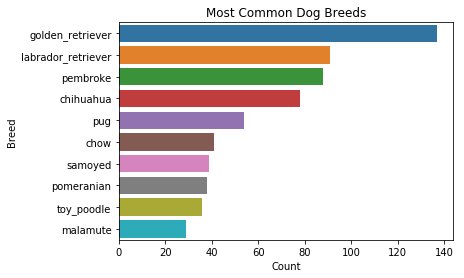

In [82]:
sns.barplot(y="Breed", x="Count", data=breed_count.head(10))
plt.title("Most Common Dog Breeds");

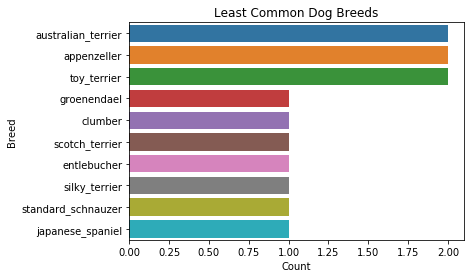

In [83]:
sns.barplot(y="Breed", x="Count", data=breed_count.tail(10))
plt.title("Least Common Dog Breeds");

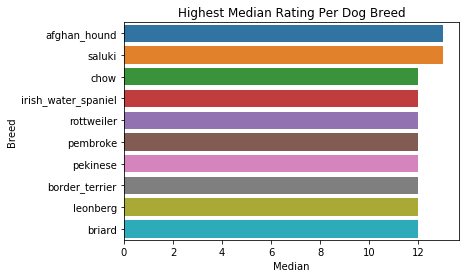

In [84]:
sns.barplot(y="Breed", x="Median", data=median_rating.head(10))
plt.title("Highest Median Rating Per Dog Breed");

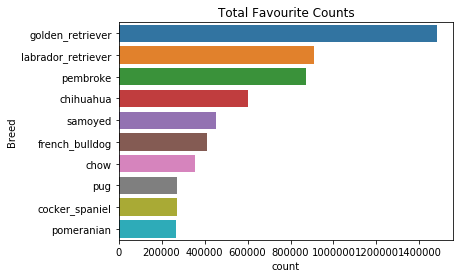

In [85]:
sns.barplot(y="Breed", x="count", data=total_favourite_count.head(10))
plt.title("Total Favourite Counts");

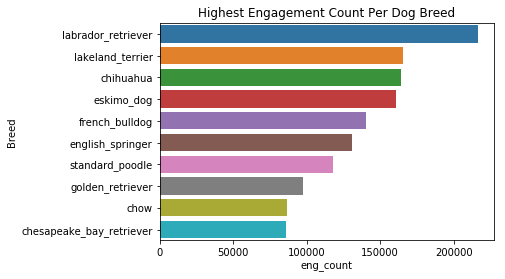

In [86]:
sns.barplot(y="Breed", x="eng_count", data=max_engagement_count.head(10))
plt.title("Highest Engagement Count Per Dog Breed");

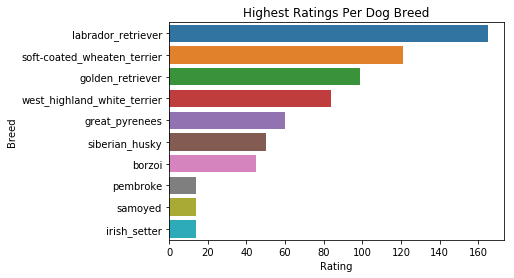

In [87]:
sns.barplot(y="Breed", x="Rating", data=max_rating.head(10))
plt.title("Highest Ratings Per Dog Breed");

### Refrences

1. How to read tweets with specific ID. https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

2. how to read json to file with encoding. https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file

3. How to write text to file https://stackoverflow.com/questions/40474139/write-text-to-file-line-by-line